<h1>Name:- Raj Khatri<br>
Roll Number:- AC-1235<br>
Subject:- Data Mining<br>
Semester:- 6<br>
Practical - 2</h1>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import ruleset
import numpy as np


In [67]:
dataset = pd.read_csv("dirty_iris.csv")


In [68]:
dataset.head(10)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
5,5.3,NaN,NaN,0.2,setosa
6,6.4,2.7,5.3,NaN,virginica
7,5.9,3.0,5.1,1.8,virginica
8,5.8,2.7,4.1,1.0,versicolor
9,4.8,3.1,1.6,0.2,setosa


In [69]:
new_n = dataset.dropna().shape[0]
n = dataset.shape[0]
print(f"Number of complete records:{new_n}")
print("Percentage of complete records:{:.2f}%".format(float(new_n*100/n)))


Number of complete records:96
Percentage of complete records:64.00%


In [70]:
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True)
dataset.replace(['?', np.inf], 'NA', inplace=True)


In [71]:
dataset.head(5)


,index,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,0,6.4,3.2,4.5,1.5,versicolor
1,1,6.3,3.3,6.0,2.5,virginica
2,3,5.0,3.4,1.6,0.4,setosa
3,4,5.7,2.6,3.5,1.0,versicolor
4,7,5.9,3.0,5.1,1.8,virginica


In [72]:
rules = []


In [73]:
rules.append(ruleset.check_species)
rules.append(ruleset.check_positive)
rules.append(ruleset.check_petal_length)
rules.append(ruleset.check_sepal_length)
rules.append(ruleset.check_sepal_length2)


In [74]:
violations = []
rule = list(map(lambda x: "rule"+str(x), range(1, len(rules)+1)))
for i in range(len(rules)):
    violation, desc = rules[i](dataset)
    print(f"{rule[i]}: {desc}\nviolations:{violation}")
    violations.append(violation)


rule1: Checking if all species consist of setosa, versicolor and virginica
violations:0
rule2: Checking if there all the length values are greater than 0
violations:1
rule3: Checking if petal length is at least twice of petal width
violations:2
rule4: Checking if all sepal lengths are below 30 cm
violations:1
rule5: Checking if sepal length is more than petal length
violations:1


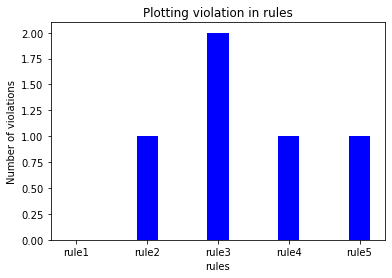

In [75]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot()
ax.bar(rule, violations, 0.3, color='blue')
plt.ylabel("Number of violations")
plt.xlabel("rules")
plt.title("Plotting violation in rules")
plt.show()


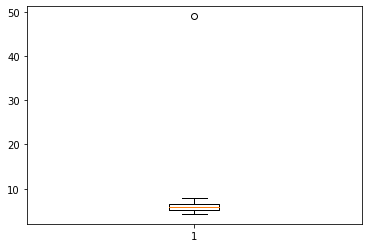

In [76]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot()
ax.boxplot(dataset["Sepal.Length"][dataset["Sepal.Length"] != 'NA'])
plt.show()


<h3>Ruleset.py</h3>
<pre>
def check_species(dataset):
    n = dataset.shape[0]
    species = dataset["Species"][dataset["Species"] != 'NA']
    correct_n = species[species.isin(
        ["setosa", "versicolor", "virginica"])].shape[0]
    return n-correct_n, "Checking if all species consist of setosa, versicolor and virginica"


def check_positive(dataset):
    violation_n = 0
    for i in dataset.values:
        for j in i:
            if isinstance(j, float):
                if j < 0:
                    violation_n += 1
    return violation_n, "Checking if there all the length values are greater than 0"


def check_petal_length(dataset):
    n = dataset.shape[0]
    correct_n = 0
    for i in range(n):
        if dataset["Petal.Width"][i] == 'NA' or dataset["Petal.Length"][i] == 'NA':
            continue
        elif dataset["Petal.Width"][i]*2 > dataset["Petal.Length"][i]:
            continue
        else:
            correct_n += 1
    return n-correct_n, "Checking if petal length is at least twice of petal width"


def check_sepal_length(dataset):
    n = dataset.shape[0]
    sl = dataset["Sepal.Length"][dataset["Sepal.Length"] != 'NA']
    correct_n = sl[sl <= 30].shape[0]
    return n-correct_n, "Checking if all sepal lengths are below 30 cm"


def check_sepal_length2(dataset):
    n = dataset.shape[0]
    correct_n = 0
    for i in range(n):
        if dataset["Sepal.Length"][i] == 'NA' or dataset["Petal.Length"][i] == 'NA':
            continue
        elif dataset["Petal.Length"][i] >= dataset["Sepal.Length"][i]:
            continue
        else:
            correct_n += 1
    return n-correct_n, "Checking if sepal length is more than petal length"

</pre>